## Santander Customer Transaction Prediction

In [2]:
import pandas as pd

train = pd.read_csv('./sample_data/train.csv')
test = pd.read_csv('./sample_data/test.csv')

print('Shape of training data: ' + str(train.shape))
print('Shape of testing data: ' + str(test.shape))

train.head()

Shape of training data: (200000, 202)
Shape of testing data: (200000, 201)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


### Check for missing value in data

In [2]:
print("Is there any null value in train dataset: " + str(train.isnull().any().any()))
print("Is there any null value in test dataset: " + str(test.isnull().any().any()))

train.describe()

Is there any null value in train dataset: False
Is there any null value in test dataset: False


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

### Some EDA

#### Standard Deviation Distribution over data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'STD Distribution')

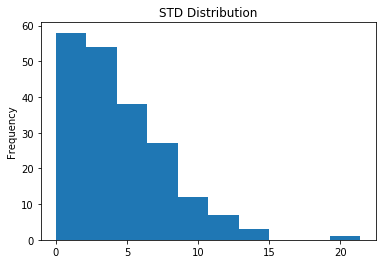

In [3]:
from matplotlib import pyplot as plt

train[train.columns[2:]].std().plot('hist')
plt.title('STD Distribution')

#### Mean Deviation Distribution over data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Mean Distribution')

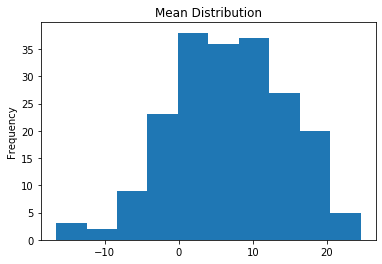

In [4]:
train[train.columns[2:]].mean().plot('hist')
plt.title('Mean Distribution')

### Ratio of Target_Variable

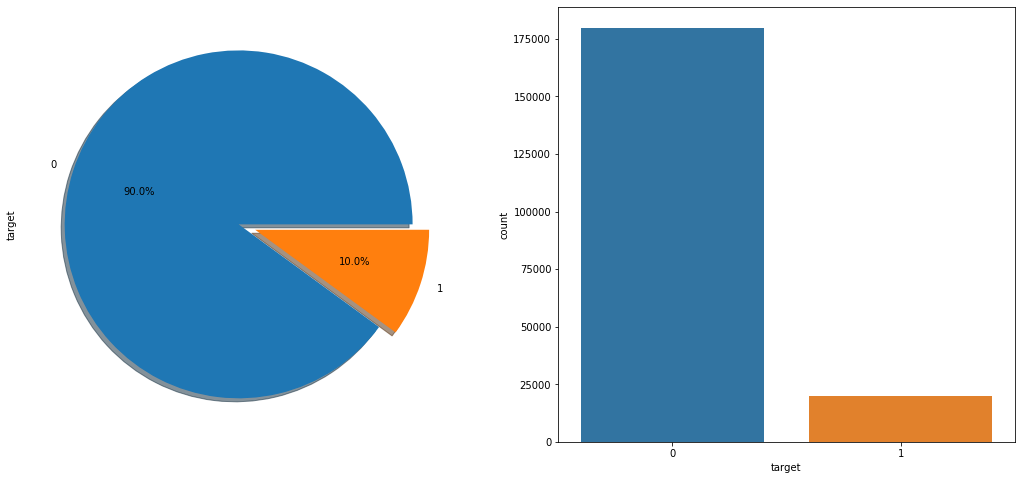

In [6]:
import seaborn as sns

ax=plt.subplots(1,2,figsize=(18,8))[1]
train['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot('target',data=train,ax=ax[1])
plt.show()

#### We can see that our data is highly imbalance as only 10% of label is 1

### First we'll try some simple Regression Model

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

target = train['target']
features = [c for c in train if c not in ['ID_code', 'target']]

kfolds = StratifiedKFold(n_splits=10, random_state=1).split(train.values, target.values)

oof = np.zeros(len(train))
predictions = np.zeros(len(test))

for k, (trn_idx, val_idx) in enumerate(kfolds):
    print('Fold: {}'.format(k))
    
    clf = LogisticRegression(solver='lbfgs', max_iter=2000, C=10)
    clf.fit(train.iloc[trn_idx][features], target[trn_idx])
    oof[val_idx] = clf.predict_proba(train.iloc[val_idx][features])[:, 1]
    predictions += clf.predict_proba(test[features])[:, 1]

    print('CV score: {}'.format(roc_auc_score(target.values, oof)))

    
predictions /= 10
    
# print('CV score: {}'.format(roc_auc_score(target.values, oof)))

Fold: 0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


CV score: 0.5035624394895757
Fold: 1
CV score: 0.5142348243515059
Fold: 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


CV score: 0.532134012582711
Fold: 3
CV score: 0.5569476839558692
Fold: 4


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


CV score: 0.5889860202290409
Fold: 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


CV score: 0.6283853941757361
Fold: 6


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


CV score: 0.675153393600427
Fold: 7


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


CV score: 0.7293989338512702
Fold: 8


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


CV score: 0.7908101529838674
Fold: 9


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


CV score: 0.8592706869622526


### Regression gave us the AUC score of 85.9%, which is not actually bad but let us try some Neural Network

In [21]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization, GaussianNoise
from keras import callbacks
import keras.backend as K

Using TensorFlow backend.


In [0]:
df_train = pd.read_csv('./sample_data/train.csv', index_col=0)
y_train = df_train.pop('target')
len_train = len(df_train)
df_test = pd.read_csv('./sample_data/test.csv', index_col=0)
df_all = pd.concat((df_train, df_test), sort=False)
prev_cols = df_all.columns

In [0]:
# PREPROCESS
scaler = StandardScaler()
df_all[prev_cols] = scaler.fit_transform(df_all[prev_cols])
df_train = df_all[0:len_train]
df_test = df_all[len_train:]

In [0]:
# CROSS VALIDATION
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

In [0]:
# LOGGER
class Logger(callbacks.Callback):
    def __init__(self, out_path='./', patience=10, lr_patience=3, out_fn='', log_fn=''):
        self.auc = 0
        self.path = out_path
        self.fn = out_fn
        self.patience = patience
        self.lr_patience = lr_patience
        self.no_improve = 0
        self.no_improve_lr = 0

    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        cv_pred = self.model.predict(self.validation_data[0], batch_size=1024)
        cv_true = self.validation_data[1]
        auc_val = roc_auc_score(cv_true, cv_pred)
        if self.auc < auc_val:
            self.no_improve = 0
            self.no_improve_lr = 0
            print("Epoch %s - best AUC: %s" % (epoch, round(auc_val, 4)))
            self.auc = auc_val
            self.model.save(self.path + self.fn, overwrite=True)
        else:
            self.no_improve += 1
            self.no_improve_lr += 1
            print("Epoch %s - current AUC: %s" % (epoch, round(auc_val, 4)))
            if self.no_improve >= self.patience:
                self.model.stop_training = True
            if self.no_improve_lr >= self.lr_patience:
                lr = float(K.get_value(self.model.optimizer.lr))
                K.set_value(self.model.optimizer.lr, 0.75*lr)
                print("Setting lr to {}".format(0.75*lr))
                self.no_improve_lr = 0

        return

### Now let us try simple Neural Network

In [0]:
import warnings
warnings.filterwarnings("ignore")

def nn_model():
    inp = Input(shape=(200, 1))
    d1 = Dense(16, activation='relu')(inp)
    fl = Flatten()(d1)
    preds = Dense(1, activation='sigmoid')(fl)
    model = Model(inputs=inp, outputs=preds)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [32]:
nn_model().summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 1)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 200, 16)           32        
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3201      
Total params: 3,233
Trainable params: 3,233
Non-trainable params: 0
_________________________________________________________________


In [34]:
preds = []
c = 0
oof_preds = np.zeros((len(df_train), 1))
for train, valid in cv.split(df_train, y_train):
    print("VAL %s" % c)
    X_train = np.reshape(df_train.iloc[train].values, (-1, 200, 1))
    y_train_ = y_train.iloc[train].values
    X_valid = np.reshape(df_train.iloc[valid].values, (-1, 200, 1))
    y_valid = y_train.iloc[valid].values
    model = nn_model()
    logger = Logger(patience=10, out_path='./', out_fn='cv_{}.h5'.format(c))
    model.fit(X_train, y_train_, validation_data=(X_valid, y_valid), epochs=50, verbose=2, batch_size=256,
              callbacks=[logger])
    model.load_weights('cv_{}.h5'.format(c))
    X_test = np.reshape(df_test.values, (200000, 200, 1))
    curr_preds = model.predict(X_test, batch_size=2048)
    oof_preds[valid] = model.predict(X_valid)
    preds.append(curr_preds)
    c += 1
auc = roc_auc_score(y_train, oof_preds)
print("CV_AUC: {}".format(auc))

VAL 0
Train on 159999 samples, validate on 40001 samples
Epoch 1/50
 - 4s - loss: 0.2595 - acc: 0.9073 - val_loss: 0.2332 - val_acc: 0.9151
Epoch 0 - best AUC: 0.8562
Epoch 2/50
 - 3s - loss: 0.2274 - acc: 0.9153 - val_loss: 0.2306 - val_acc: 0.9153
Epoch 1 - best AUC: 0.8696
Epoch 3/50
 - 3s - loss: 0.2172 - acc: 0.9189 - val_loss: 0.2174 - val_acc: 0.9207
Epoch 2 - best AUC: 0.8778
Epoch 4/50
 - 3s - loss: 0.2118 - acc: 0.9204 - val_loss: 0.2147 - val_acc: 0.9207
Epoch 3 - best AUC: 0.8811
Epoch 5/50
 - 3s - loss: 0.2096 - acc: 0.9212 - val_loss: 0.2180 - val_acc: 0.9195
Epoch 4 - best AUC: 0.8827
Epoch 6/50
 - 3s - loss: 0.2077 - acc: 0.9223 - val_loss: 0.2135 - val_acc: 0.9210
Epoch 5 - best AUC: 0.8843
Epoch 7/50
 - 3s - loss: 0.2067 - acc: 0.9225 - val_loss: 0.2134 - val_acc: 0.9217
Epoch 6 - best AUC: 0.8853
Epoch 8/50
 - 3s - loss: 0.2053 - acc: 0.9231 - val_loss: 0.2113 - val_acc: 0.9224
Epoch 7 - best AUC: 0.886
Epoch 9/50
 - 3s - loss: 0.2047 - acc: 0.9231 - val_loss: 0.2101

In [0]:
preds = np.asarray(preds)
preds = preds.reshape((5, 200000))
preds_final = np.mean(preds.T, axis=1)
submission = pd.read_csv('sample_submission.csv')
submission['target'] = preds_final
submission.to_csv('submission.csv', index=False)

### Simple neural network gave us AUC score of 89.8%

### Now we'll try Convolution Neural Network  

In [56]:
train_path = './sample_data/train.csv'
test_path = './sample_data/test.csv'

df_test = pd.read_csv(test_path)
df_test.drop(['ID_code'], axis=1, inplace=True)
df_test = df_test.values

unique_samples = []
unique_count = np.zeros_like(df_test)
for feature in range(df_test.shape[1]):
    _, index_, count_ = np.unique(df_test[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print('Found',len(real_samples_indexes),'real test')
print('Found',len(synthetic_samples_indexes),'fake test')


d = {}
for i in range(200): d['var_'+str(i)] = 'float32'
d['target'] = 'uint8'
d['ID_code'] = 'object'

train = pd.read_csv('./sample_data/train.csv', dtype=d)
test = pd.read_csv('./sample_data/test.csv', dtype=d)

print('Loaded',len(train),'rows of train')
print('Loaded',len(test),'rows of test')
print('Found',len(real_samples_indexes),'real test')
print('Found',len(synthetic_samples_indexes),'fake test')


d = {}
for i in range(200): d['var_'+str(i)] = 'float32'
d['target'] = 'uint8'
d['ID_code'] = 'object'

train = pd.read_csv(train_path, dtype=d)
test = pd.read_csv(test_path, dtype=d)

print('Loaded',len(train),'rows of train')
print('Loaded',len(test),'rows of test')

Found 100000 real test
Found 100000 fake test
Loaded 200000 rows of train
Loaded 200000 rows of test
Found 100000 real test
Found 100000 fake test
Loaded 200000 rows of train
Loaded 200000 rows of test


In [50]:
! pip install git+https://www.github.com/keras-team/keras-contrib.git
! wget https://github.com/jganzabal/santander_kaggle_solutions_tests/raw/master/santander_helper.py
from santander_helper import auc, DataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold
from keras_contrib.callbacks import CyclicLR
import gc
from keras.layers import Conv1D, Flatten

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-d4pdax0l
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-d4pdax0l
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101065 sha256=d1f26a4a8c2bb22af674bb2b1ca16a977f7557c4b736ad77cca9277f9b0da30e
  Stored in directory: /tmp/pip-ephem-wheel-cache-9wgbj0q5/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib
--2019-12-01 19:37:16--  https://github.com/jganzabal/santander_kaggle_solutions_tests/raw/master/santander_helper.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jganzabal/santander_kaggle_solutions_tests/master/santander_helper.py [following]
--2019-12-01 19:37:16--  https://raw.githubusercontent.co

In [57]:
def encode_FE(df,col,test):
    cv = df[col].value_counts()
    nm = col+'_FE'
    df[nm] = df[col].map(cv)
    test[nm] = test[col].map(cv)
    test[nm].fillna(0,inplace=True)
    if cv.max()<=255:
        df[nm] = df[nm].astype('uint8')
        test[nm] = test[nm].astype('uint8')
    else:
        df[nm] = df[nm].astype('uint16')
        test[nm] = test[nm].astype('uint16')        
    return

test['target'] = -1
comb = pd.concat([train,test.loc[real_samples_indexes]],axis=0,sort=True)
for i in range(200): 
    encode_FE(comb,'var_'+str(i),test)
train = comb[:len(train)]; del comb
print('New 200 features added!')

New 200 features added!


In [58]:
del df_test, real_samples_indexes, synthetic_samples_indexes, unique_count, unique_samples, d
gc.collect()

717

In [0]:
df_train_data = train.drop(columns=['ID_code'])
y = df_train_data['target'].values
df_train_X = df_train_data.drop(columns=['target'])

In [0]:
reverse_columns = True
if reverse_columns:
    reverse_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 15, 16, 18, 19, 22, 24, 25, 26,
                    27, 29, 32, 35, 37, 40, 41, 47, 48, 49, 51, 52, 53, 55, 60, 61,
                    62, 65, 66, 67, 69, 70, 71, 74, 78, 79, 82, 84, 89, 90, 91, 94,
                    95, 96, 97, 99, 103, 105, 106, 110, 111, 112, 118, 119, 125, 128,
                    130, 133, 134, 135, 137, 138, 140, 144, 145, 147, 151, 155, 157,
                    159, 161, 162, 163, 164, 167, 168, 170, 171, 173, 175, 176, 179,
                    180, 181, 184, 185, 187, 189, 190, 191, 195, 196, 199,
                    ]

    for j in reverse_list:
        df_train_X[f'var_{j}'] *= -1

In [0]:
means = df_train_X.mean(axis=0)
stds = df_train_X.std(axis=0)
df_train_X_normalized = (df_train_X - means)/stds

In [0]:
X_train_normalized = np.zeros((df_train_X_normalized.shape[0], 400, 1))
for i in range(200):
    X_train_normalized[:, 2*i] = df_train_X_normalized[[f'var_{i}']].values #[indexes]
    X_train_normalized[:, 2*i+1] = df_train_X_normalized[[f'var_{i}_FE']].values #[indexes]

In [0]:
def get_model(N_units = 600, kernel_size=2, strides=2):
    model = Sequential()
    model.add(Conv1D(N_units, kernel_size=kernel_size, strides=strides, padding='valid', 
                     activation='relu', input_shape=(X_train_normalized.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [51]:
get_model().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 200, 600)          1800      
_________________________________________________________________
flatten_9 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 120001    
Total params: 121,801
Trainable params: 121,801
Non-trainable params: 0
_________________________________________________________________


In [52]:
del df_train_data, df_train_X
gc.collect()

139

In [53]:
best_model_file_name = 'best_full_model_aux.hdf5'
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
patience = 18
epochs = 5
bs = 512
N_units = 600
common_rows = 2
class_0_aug = 4
class_1_aug = 6

for fold, (trn_idx, val_idx) in enumerate(skf.split(df_train_X_normalized, y)):
    print(f'##################Fold {fold}#######################')
    model = get_model(N_units)
    model.compile(Adam(), loss='binary_crossentropy', metrics=[auc, 'accuracy'])
    es = EarlyStopping(monitor='val_auc', patience=patience, mode='max', verbose=1)
    mc = ModelCheckpoint(best_model_file_name, monitor='val_auc', mode='max', verbose=1, save_best_only=True)
 
    generator = DataGenerator(X_train_normalized[trn_idx], y[trn_idx], 
                              batch_size=bs, shuffle=True, 
                              class_1_aug=class_1_aug, 
                              class_0_aug=class_0_aug,
                              common_rows = common_rows
                             )
    tr_iter_in_epoch = generator.__len__()

    clr = CyclicLR(base_lr=0.0001, max_lr=0.005, step_size=4*tr_iter_in_epoch, mode='triangular2')
    X_val_data, y_val_data = DataGenerator.augment(X_train_normalized[val_idx], 
                                     y[val_idx], class_1_aug=class_1_aug//2, class_0_aug=class_0_aug//2, common_rows = common_rows)
    indexes_val = np.arange(len(y_val_data))
    np.random.shuffle(indexes_val)
    model.fit_generator(generator,
              epochs=epochs,
              verbose=2,
              callbacks = [es, 
                           mc, 
                           clr],
              validation_data=(X_val_data[indexes_val], y_val_data[indexes_val])
                )
    
    model = get_model()

    model.load_weights(best_model_file_name)
    
    model.save_weights(f'CNN_generator_fold_{fold}_cl1_{class_1_aug}_cl0_{class_0_aug}_{N_units}.hdf5')

##################Fold 0#######################
Epoch 1/5
 - 29s - loss: 0.2750 - auc: 0.8735 - acc: 0.8918 - val_loss: 0.2473 - val_auc: 0.9053 - val_acc: 0.9019

Epoch 00001: val_auc improved from -inf to 0.90530, saving model to best_full_model_aux.hdf5
Epoch 2/5
 - 40s - loss: 0.2398 - auc: 0.9099 - acc: 0.9058 - val_loss: 0.2377 - val_auc: 0.9124 - val_acc: 0.9063

Epoch 00002: val_auc improved from 0.90530 to 0.91236, saving model to best_full_model_aux.hdf5
Epoch 3/5
 - 40s - loss: 0.2325 - auc: 0.9162 - acc: 0.9090 - val_loss: 0.2546 - val_auc: 0.9169 - val_acc: 0.9030

Epoch 00003: val_auc improved from 0.91236 to 0.91687, saving model to best_full_model_aux.hdf5
Epoch 4/5
 - 41s - loss: 0.2287 - auc: 0.9187 - acc: 0.9108 - val_loss: 0.2347 - val_auc: 0.9180 - val_acc: 0.9089

Epoch 00004: val_auc improved from 0.91687 to 0.91797, saving model to best_full_model_aux.hdf5
Epoch 5/5
 - 40s - loss: 0.2241 - auc: 0.9220 - acc: 0.9125 - val_loss: 0.2240 - val_auc: 0.9192 - val_acc:

In [0]:
df_test = test.drop(columns=['ID_code', 'target'])
if reverse_columns:
    for j in reverse_list:
        df_test[f'var_{j}'] *= -1
df_test_X_normalized = (df_test - means)/stds

In [0]:
X_test_normalized = np.zeros((df_test_X_normalized.shape[0], 400, 1))
for i in range(200):
    X_test_normalized[:, 2*i] = df_test_X_normalized[[f'var_{i}']].values
    X_test_normalized[:, 2*i+1] = df_test_X_normalized[[f'var_{i}_FE']].values

In [63]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
full_val_preds = np.zeros((len(df_train_X_normalized), 1))
model = get_model(N_units)
test_predictions = 0
for fold, (trn_idx, val_idx) in enumerate(skf.split(df_train_X_normalized, y)):
    print(f'##################Fold {fold}#######################')
    X_train = X_train_normalized[trn_idx]
    X_val = X_train_normalized[val_idx]
    filename = f'CNN_generator_fold_{fold}_cl1_{class_1_aug}_cl0_{class_0_aug}_{N_units}.hdf5'
    model.load_weights(filename)
    full_val_preds[val_idx] = model.predict(X_val, verbose=1)
    print(roc_auc_score(y[val_idx], full_val_preds[val_idx]))
    test_predictions = test_predictions + model.predict(X_test_normalized, verbose=1)/5

##################Fold 0#######################
40001/40001 [==============================] - 2s 54us/step
0.9168077167869555
200000/200000 [==============================] - 10s 50us/step
##################Fold 1#######################
40001/40001 [==============================] - 2s 52us/step
0.9140942165302556
200000/200000 [==============================] - 9s 47us/step
##################Fold 2#######################
40000/40000 [==============================] - 2s 47us/step
0.9215534300426715
200000/200000 [==============================] - 10s 48us/step
##################Fold 3#######################
39999/39999 [==============================] - 2s 47us/step
0.915788197418571
200000/200000 [==============================] - 10s 48us/step
##################Fold 4#######################
39999/39999 [==============================] - 2s 48us/step
0.9177610940860264
200000/200000 [==============================] - 10s 48us/step


### Convolution Neural Network gave as AUC of 91.6% which is our final model

In [64]:
roc_auc_score(y, full_val_preds)

0.9162280696727534

In [0]:
def save_submit_file(predictions, filename, test_filename=test_path, index_column='ID_code', target_column = 'target'):
    df_test_submit = pd.read_csv(test_filename).set_index(index_column)
    df_test_submit[target_column] = predictions
    df_test_submit[[target_column]].to_csv(filename)
    return 

In [0]:
save_submit_file(test_predictions, 
                 f'final.csv')